<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [70]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv', index_col=0)

#### Agregue su código a continuación siguiendo las instrucciones proporcionadas en el curso para completar la tarea calificada por pares


In [71]:
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7


A continuación se describen las variables del conjunto de datos:
- CRIM - tasa de delincuencia per cápita por ciudad
- ZN - proporción de terrenos residenciales divididos en zonas para parcelas de más de 25.000 pies cuadrados.
- INDUS - proporción de acres comerciales no minoristas por ciudad.
- CHAS - Variable ficticia del río Charles (1 si la zona linda con el río; 0 en caso contrario)
- NOX - concentración de óxidos nítricos (partes por 10 millones)
- RM - número medio de habitaciones por vivienda
- EDAD - proporción de unidades ocupadas por sus propietarios construidas antes de 1940
- DIS - distancias ponderadas a cinco centros de empleo de Boston
- RAD - índice de accesibilidad a autopistas radiales
- TAX - tipo del impuesto sobre bienes inmuebles de valor íntegro por 10.000 $
- PTRATIO - ratio alumnos-profesor por ciudad
- LSTAT - % más bajo de la población
- MEDV - Valor medio de las viviendas ocupadas por sus propietarios, en miles de $

# EDA

In [72]:
boston_df.shape

(506, 13)

In [73]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 55.3 KB


In [74]:
boston_df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [75]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

Comprobación de outliers

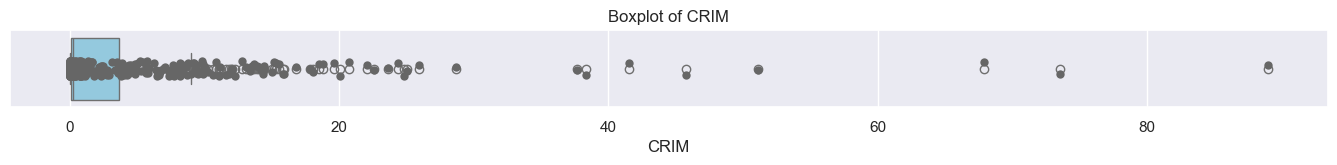

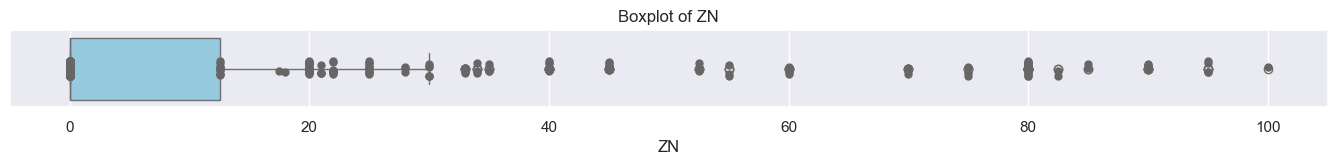

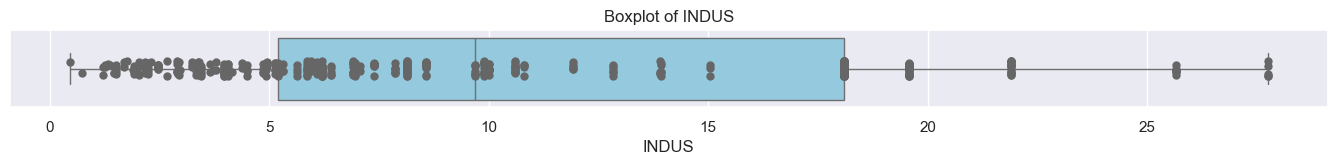

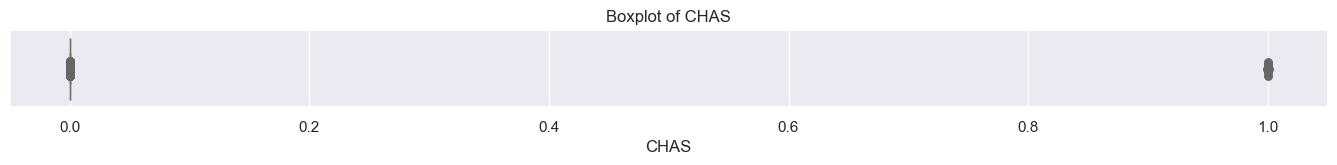

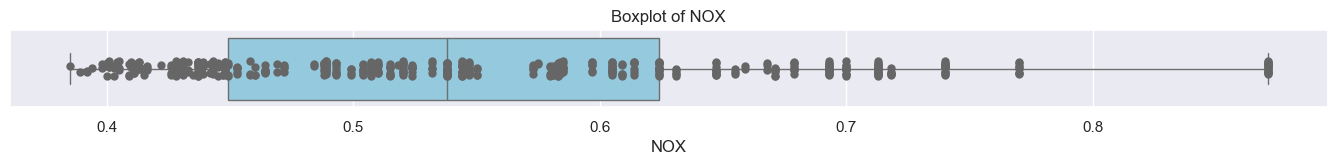

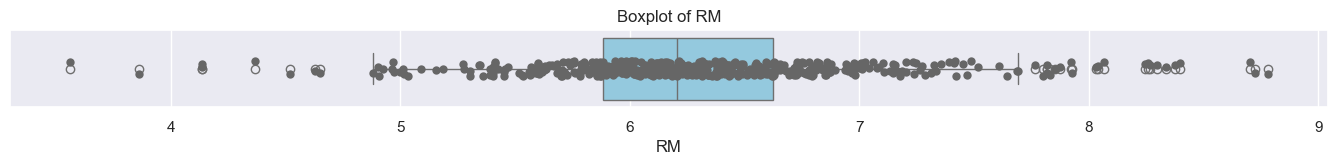

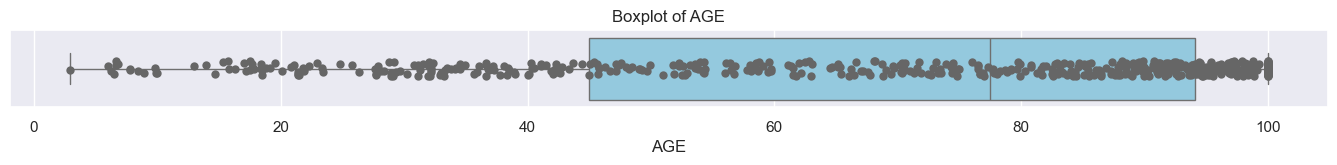

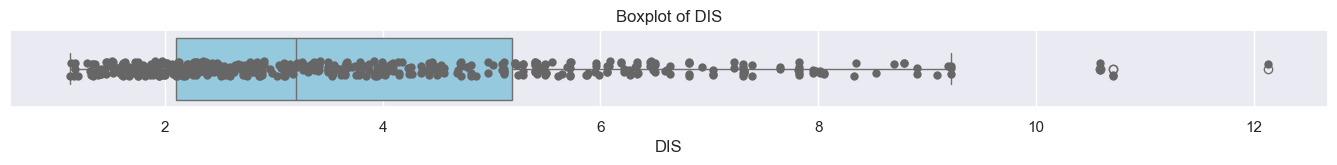

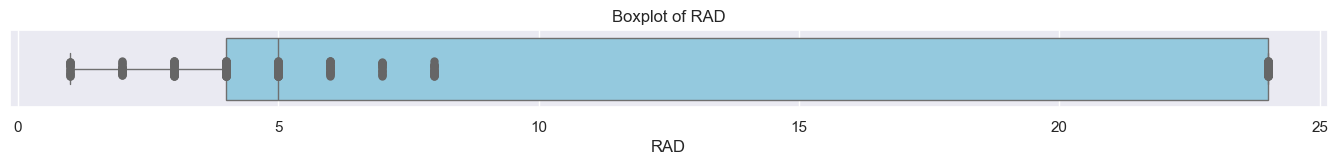

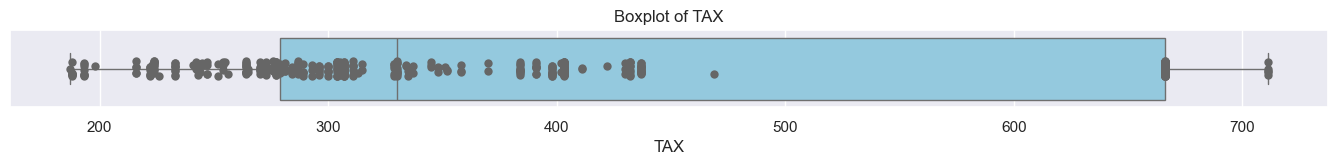

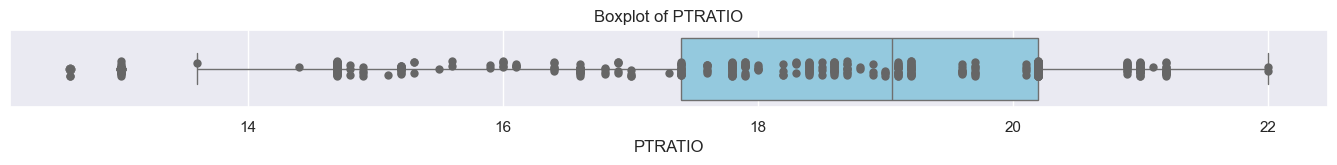

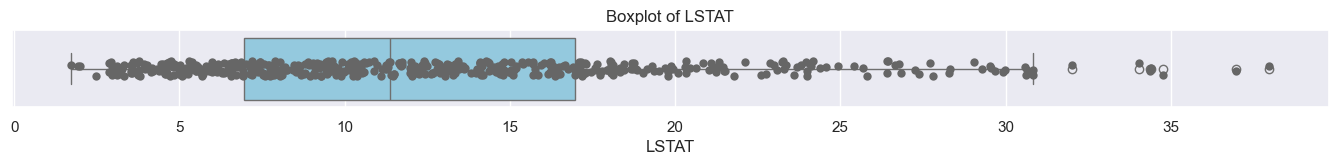

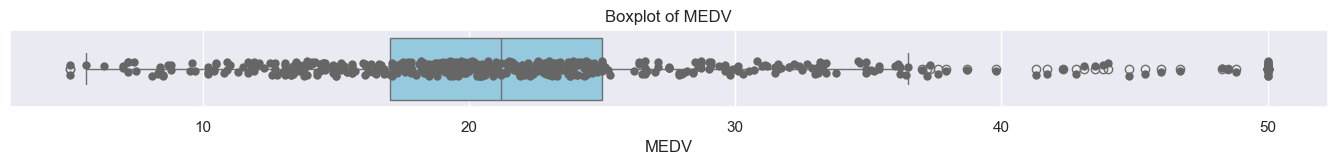

In [76]:
sns.set_theme(style="darkgrid")
for col in boston_df.columns:
  plt.figure(figsize=(17,1))
  sns.boxplot(data=boston_df, x=col, color='skyblue')
  # Add in points to show each observation
  sns.stripplot(boston_df, x=col, size=6, color="0.4")
  plt.title(f'Boxplot of {col}')
  plt.show()

Detectando atipicos con Método de Tukey con 1.5 y no 3

In [77]:
#Nº de Outliers usando rango IQR
outliers=[]

for col in boston_df.columns:
  Q1 = np.percentile(boston_df[col], 25)  # Primer cuartil (percentil 25)
  Q3 = np.percentile(boston_df[col], 75)  # Tercer cuartil (percentil 75)
  #Calculo de IQR
  IQR = Q3 - Q1
  #Límite inferior
  lower_bound = Q1 - 1.5 * IQR
  #Límite superior
  upper_bound = Q3 + 1.5 * IQR
  outlier_count = ((boston_df[col] < lower_bound) | (boston_df[col] > upper_bound)).sum()
  outliers.append({'Variable': col, 'Nº Outliers': outlier_count})

pd.DataFrame(outliers)

,Variable,Nº Outliers
0,CRIM,66
1,ZN,68
2,INDUS,0
3,CHAS,35
4,NOX,0
5,RM,30
6,AGE,0
7,DIS,5
8,RAD,0
9,TAX,0


Correlación

<Axes: >

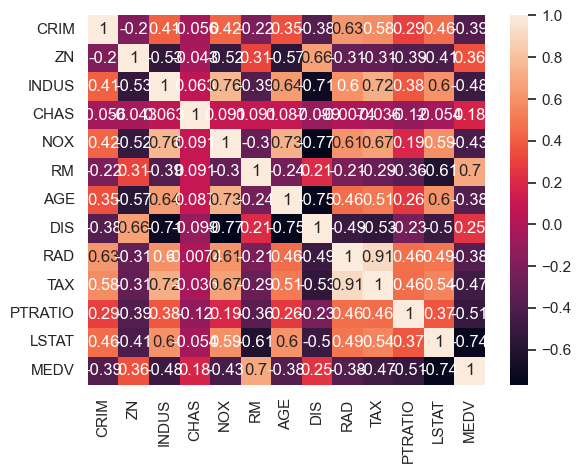

In [78]:
matriz=boston_df.corr()
sns.heatmap(matriz,annot=True)

Exploración visual

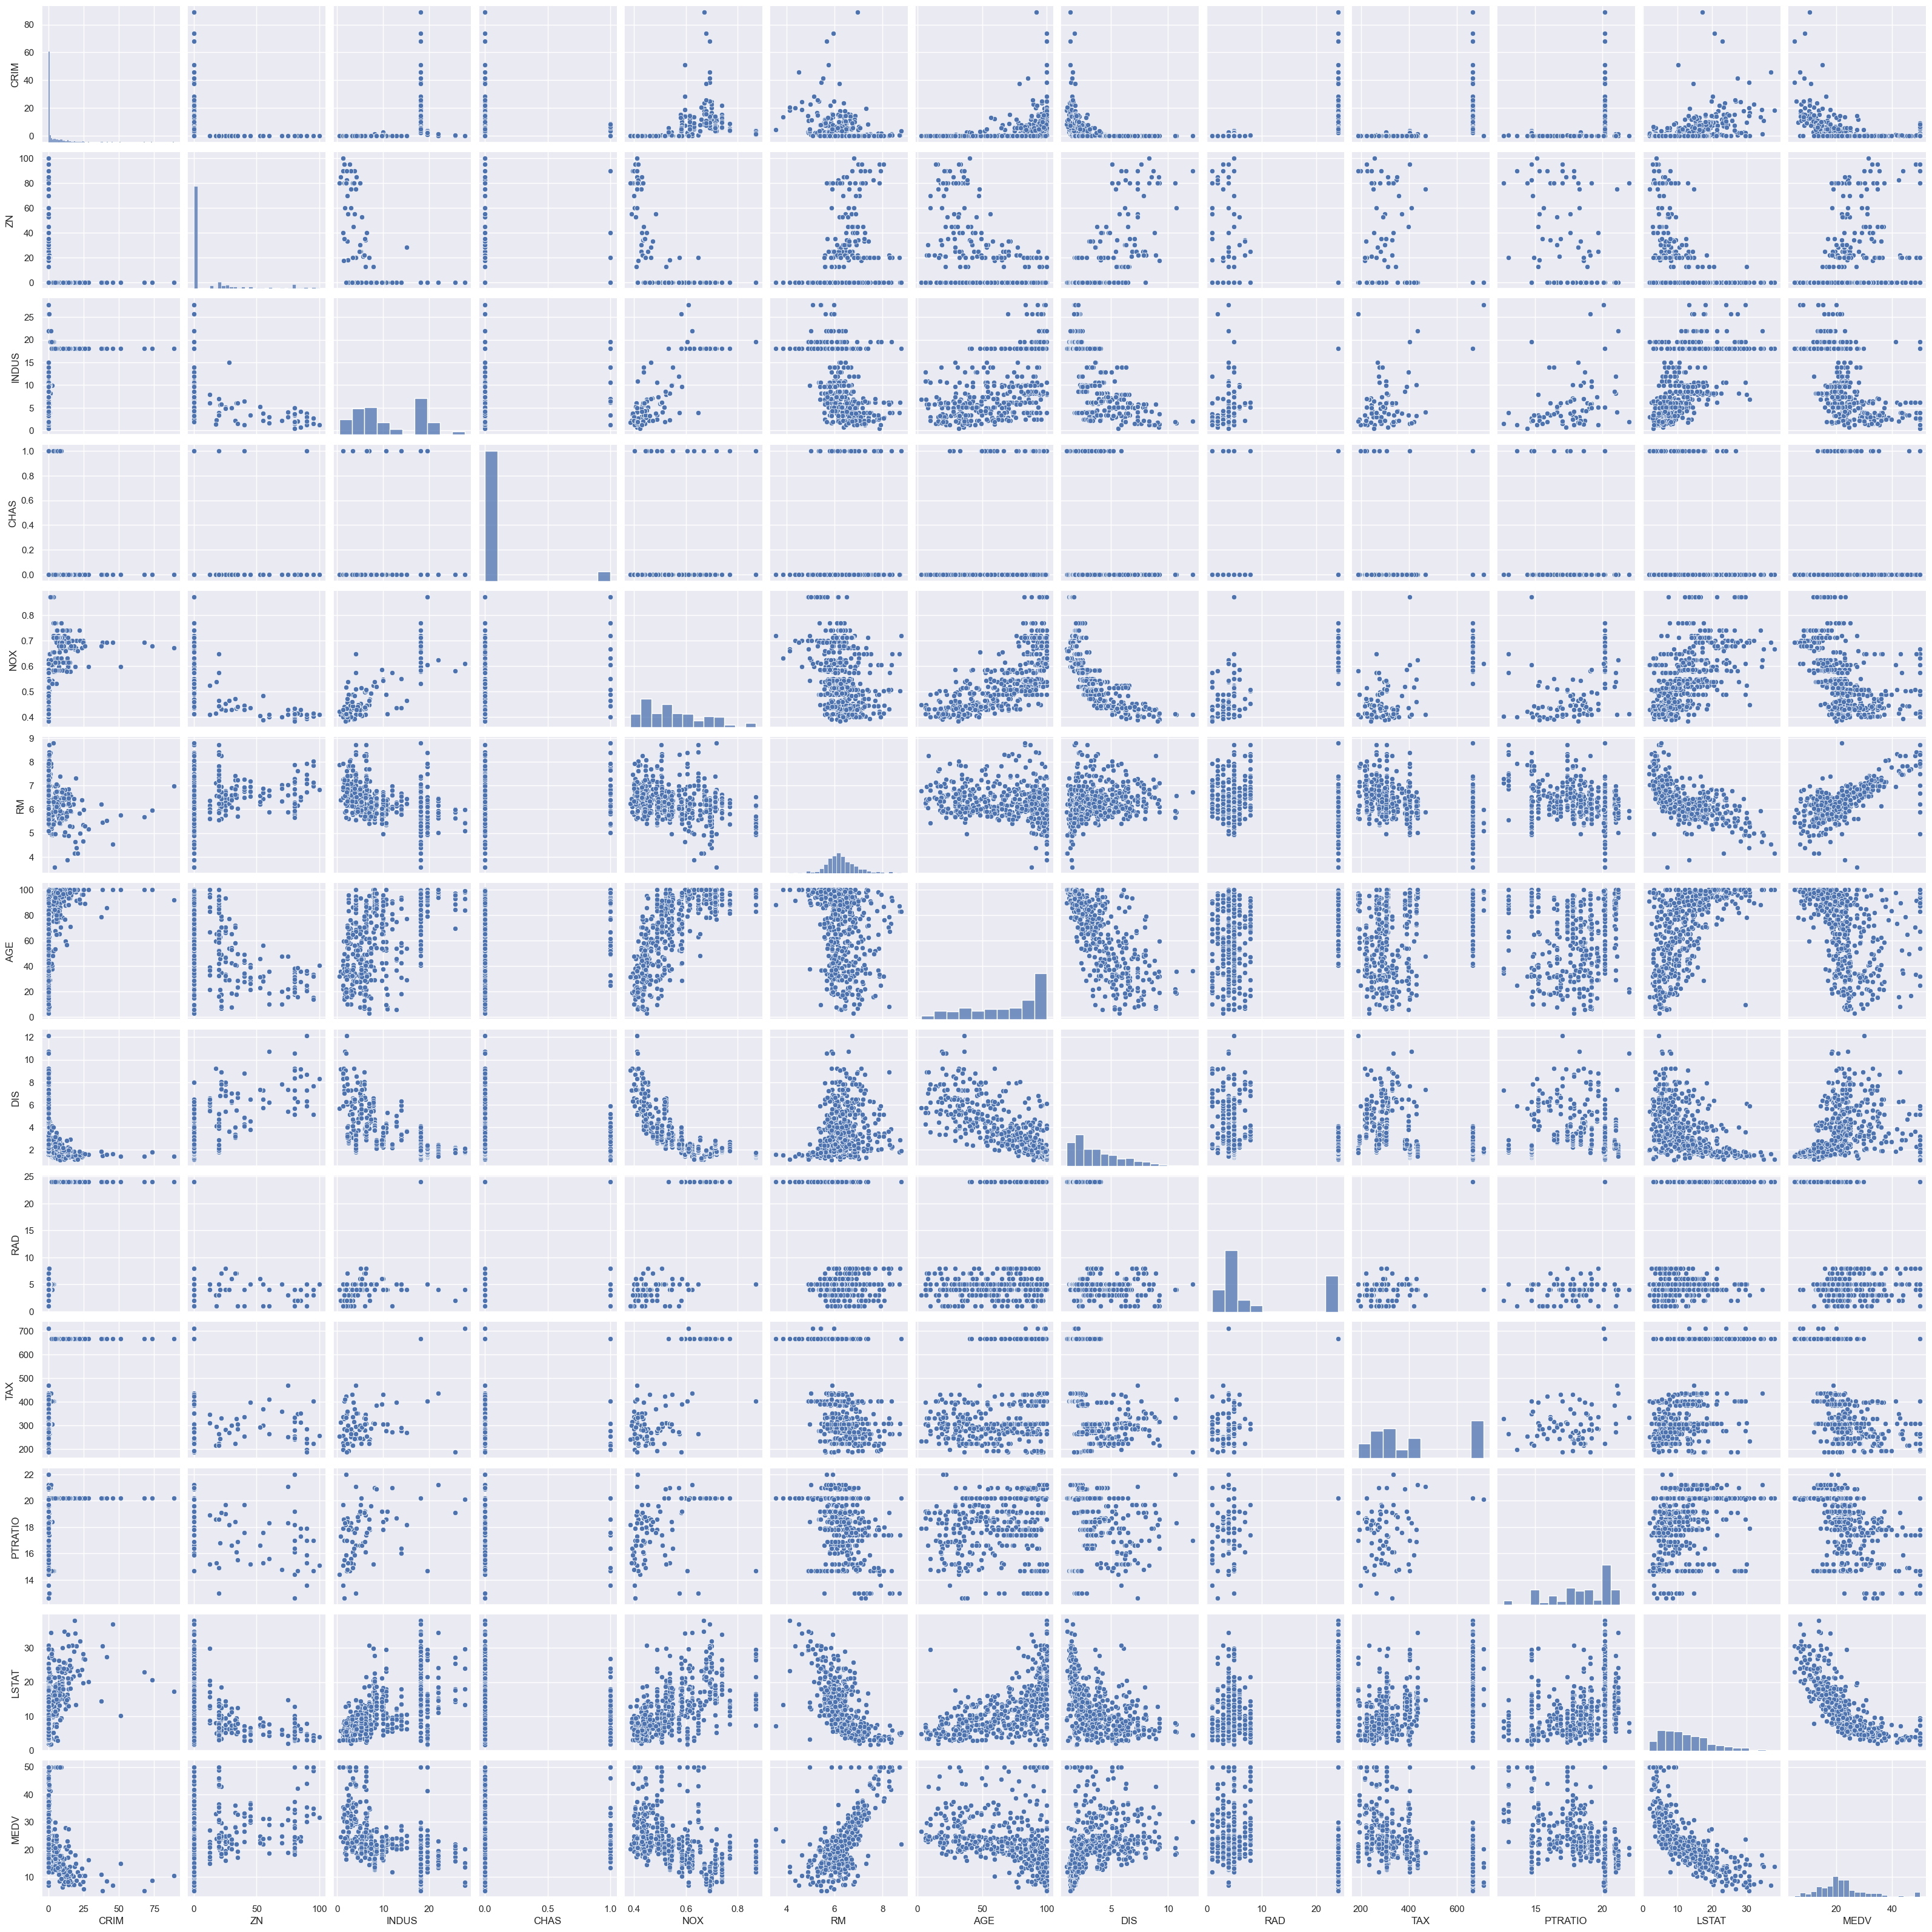

In [79]:
#Graficar correlaciones
sns.pairplot(boston_df)

## ¿Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles o no? (Prueba T para muestras independientes)

State the hypothesis
* $H_0: µ_1 = µ_2$ ("no hay diferencia en el valor medio de las casas")
* $H_1: µ_1 ≠ µ_2$ ("hay una diferencia en valor de las casas")

In [80]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                    boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

TtestResult(statistic=np.float64(3.996437466090509), pvalue=np.float64(7.390623170519905e-05), df=np.float64(504.0))

**Conclusión:** Dado que el valor p es menor que el valor alfa 0,05, rechazamos la hipótesis nula ya que hay pruebas suficientes de que existe una diferencia estadística en el valor de las casas delimitadas por el rio y las que no

## ¿Existe alguna diferencia en los valores medios de las casas (MEDV) para cada proporción de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE)? (ANOVA)

In [81]:
boston_df['AGE'].value_counts().sort_index()

AGE
2.9       1
6.0       1
6.2       1
6.5       1
6.6       2
         ..
98.8      4
98.9      3
99.1      1
99.3      1
100.0    43
Name: count, Length: 356, dtype: int64

In [82]:
boston_df.loc[(boston_df['AGE'] <= 20), 'AGE_GROUP'] = 'MENOS DE 20 AÑOS'
boston_df.loc[(boston_df['AGE'] > 20)&(boston_df['AGE'] < 40), 'AGE_GROUP'] = 'ENTRE 20 Y 40 AÑOS'
boston_df.loc[(boston_df['AGE'] > 40)&(boston_df['AGE'] < 60), 'AGE_GROUP'] = 'ENTRE 40 Y 60 AÑOS'
boston_df.loc[(boston_df['AGE'] > 60)&(boston_df['AGE'] < 80), 'AGE_GROUP'] = 'ENTRE 60 Y 80 AÑOS'
boston_df.loc[(boston_df['AGE'] >= 80), 'AGE_GROUP'] = 'MÁS DE 80 AÑOS'

In [83]:
boston_df['AGE_GROUP'].value_counts()

AGE_GROUP
MÁS DE 80 AÑOS        240
ENTRE 60 Y 80 AÑOS     81
ENTRE 40 Y 60 AÑOS     76
ENTRE 20 Y 40 AÑOS     74
MENOS DE 20 AÑOS       34
Name: count, dtype: int64

State the hypothesis
* $H_0: µ_1 = µ_2 = µ_3$ (Los tres valores medios de las casas son iguales)
* $H_1:$ Al menos uno de los valores medios difiere

Prueba de igualdad de varianza

In [84]:
scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == 'MENOS DE 20 AÑOS']['MEDV'],
                    boston_df[boston_df['AGE_GROUP'] == 'ENTRE 20 Y 40 AÑOS']['MEDV'],
                    boston_df[boston_df['AGE_GROUP'] == 'ENTRE 40 Y 60 AÑOS']['MEDV'],
                    boston_df[boston_df['AGE_GROUP'] == 'ENTRE 60 Y 80 AÑOS']['MEDV'],
                    boston_df[boston_df['AGE_GROUP'] == 'MÁS DE 80 AÑOS']['MEDV'],
                    center='mean')

LeveneResult(statistic=np.float64(1.4581361241370034), pvalue=np.float64(0.21376516432837903))

Valor P mayor de 0.05 por lo que las varianzas son iguales

In [85]:
GRUPO1 = boston_df[boston_df['AGE_GROUP'] == 'MENOS DE 20 AÑOS']['MEDV']
GRUPO2 = boston_df[boston_df['AGE_GROUP'] == 'ENTRE 20 Y 40 AÑOS']['MEDV']
GRUPO3 = boston_df[boston_df['AGE_GROUP'] == 'ENTRE 40 Y 60 AÑOS']['MEDV']
GRUPO4 = boston_df[boston_df['AGE_GROUP'] == 'ENTRE 60 Y 80 AÑOS']['MEDV']
GRUPO5 = boston_df[boston_df['AGE_GROUP'] == 'MÁS DE 80 AÑOS']['MEDV']

In [86]:
f_statistic, p_value = scipy.stats.f_oneway(GRUPO1, GRUPO2, GRUPO3, GRUPO4, GRUPO5)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 20.138617341476493, P-Value: 2.1591723141704354e-15


**Conclusión:** Dado que el valor p es menor que 0,05, rechazaremos la hipótesis nula ya que hay evidencia significativa de que al menos una de las medias difiere.

## ¿Podemos concluir que no existe relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad? (Correlación de Pearson)

State the hypothesis:
* $H_0:$ La concentración de oxido nitrico no está correlacionada con la proporción de acres comerciales no minoristas por ciudad
* $H_1:$ La concentración de oxido nitrico está correlacionada con la proporción de acres comerciales no minoristas por ciudad

Text(0.5, 1.02, 'Grafico de disperción con linea de regresión de NOX y INDUS')

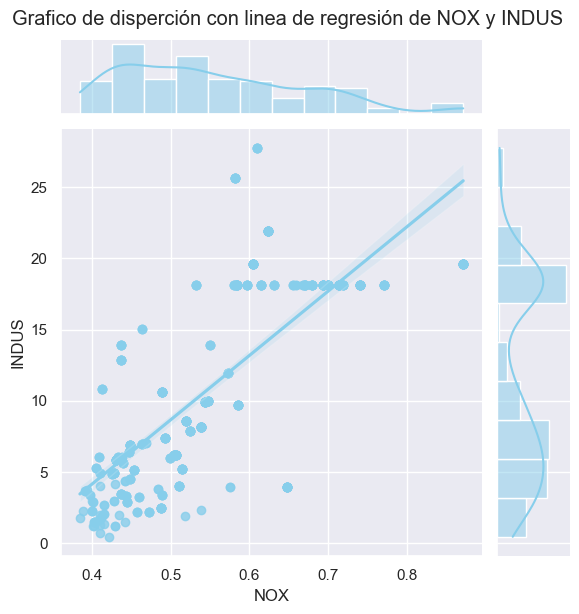

In [92]:
sns.jointplot(x="NOX", y="INDUS", data=boston_df, kind="reg", color='skyblue')
plt.suptitle('Grafico de disperción con linea de regresión de NOX y INDUS',y =1.02)

In [88]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=np.float64(0.763651446920915), pvalue=np.float64(7.913361061241532e-98))

**Conclusión:** Dado que el valor p (Sig. (2 colas) < 0,05, rechazamos la hipótesis nula y concluimos que existe una relación entre NOX e INDUS, que además podemos notar en el grafico de regresión

## ¿Cuál es el impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston sobre el valor medio de las viviendas ocupadas por sus propietarios? (Análisis de regresión)

Text(0.5, 1.02, 'Grafico de disperción con linea de regresión de DIS y MEDV')

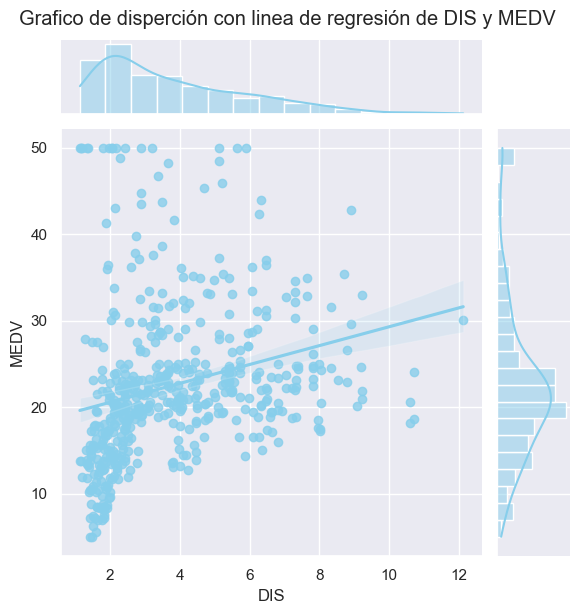

In [93]:
sns.jointplot(x="DIS", y="MEDV", data=boston_df, kind="reg", color='skyblue')
plt.suptitle('Grafico de disperción con linea de regresión de DIS y MEDV',y =1.02)

In [91]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        19:51:46   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusión:** p < 0,05 existe evidencia de correlación entre la DIS y MEDV